<h1 align="center"> Clustering </h1>

In [ ]:
pip install pandas


In [ ]:
pip install numpy


In [ ]:
pip install sklearn


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn


In [ ]:
pip install scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Load Dataset

In [3]:
# loading dataset into Pandas DataFrame
df = pd.read_csv('expression_data.csv')

In [4]:
display(df)

,strain,SPAC212.11,SPAC212.09c,SPAC212.04c,SPNCRNA.601,SPAC977.11,SPAC977.13c,SPAC977.15,SPAC977.16c,SPNCRNA.607,SPAC1F8.06
0,wt,4.947329,5.443589,5.751174,5.731843,7.046601,5.335904,6.500652,7.237060,5.961123,6.640223
1,wt,4.969572,6.205209,5.058125,4.868198,6.837324,5.339053,6.232901,7.457934,5.691651,6.651266
2,wt,5.657995,6.172470,5.544557,4.936256,6.788719,5.310125,6.697946,7.475547,5.942602,6.777698
3,wt,5.452545,5.943911,5.675589,5.569892,6.870560,5.319716,7.028231,7.088272,5.923746,4.616742
4,wt,5.444799,6.333457,5.175381,5.319763,6.092104,5.988160,6.923664,7.461087,5.874517,5.607453
5,wt,6.501252,6.405294,5.101433,4.198365,6.189225,5.295882,7.534349,7.646591,4.842055,6.149393
6,wt,5.078831,6.711639,5.823344,5.168548,6.908198,7.606185,6.441425,6.878977,7.377979,5.655475
7,wt,5.254861,7.146486,6.313480,4.772003,6.658501,7.483295,6.680045,7.131173,7.304704,6.497174
8,wt,5.324121,6.932336,6.595747,5.078932,6.932336,7.142835,6.766412,7.632571,7.597660,6.441647
9,wt,4.853563,6.790664,5.618074,5.399681,6.220495,5.742349,5.742349,6.535896,6.960366,6.655092


## Optimal number of Clusters

In [6]:
x = StandardScaler().fit_transform(df.iloc[:,1:])

In [7]:
y = df.loc[:,['strain']]

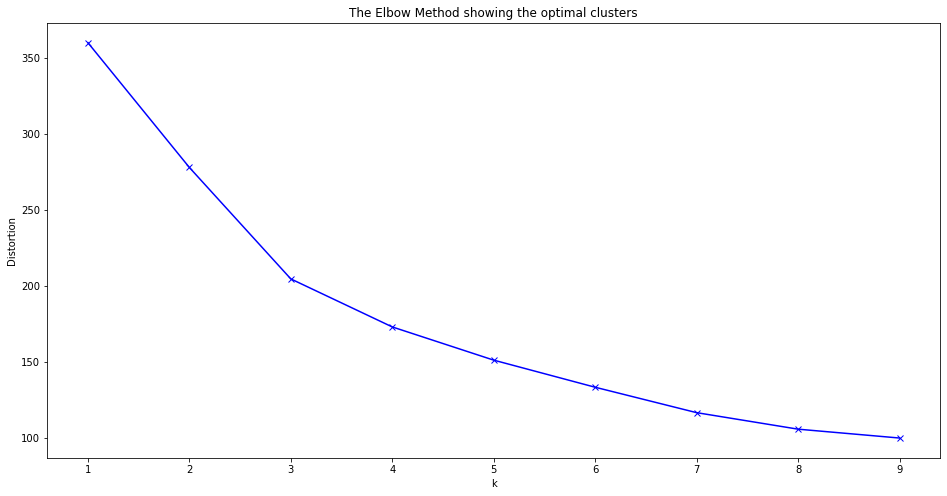

In [8]:
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_)# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

## K-Means

In [9]:
kmeans_model = KMeans(n_clusters=4, n_jobs=3, random_state=32932)

In [10]:
prediction = kmeans_model.fit_predict(x)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [11]:
df['Cluster_Kmeans'] = prediction

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other? 

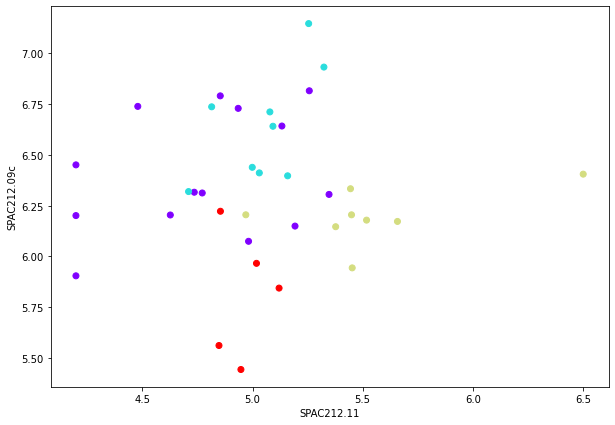

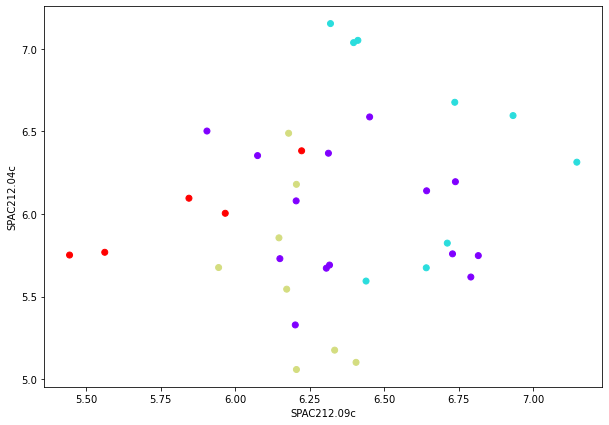

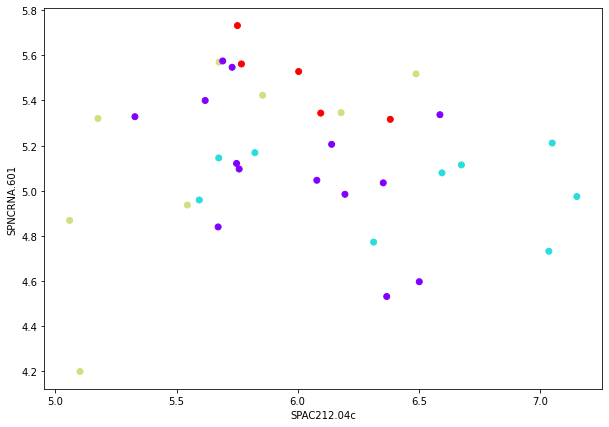

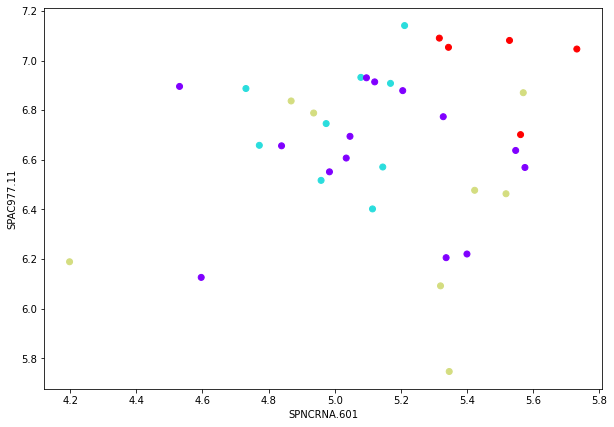

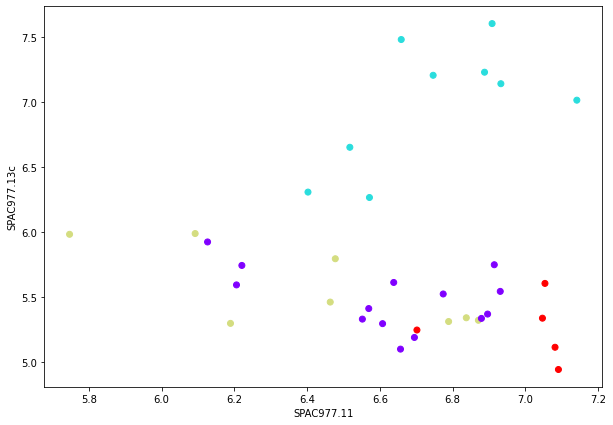

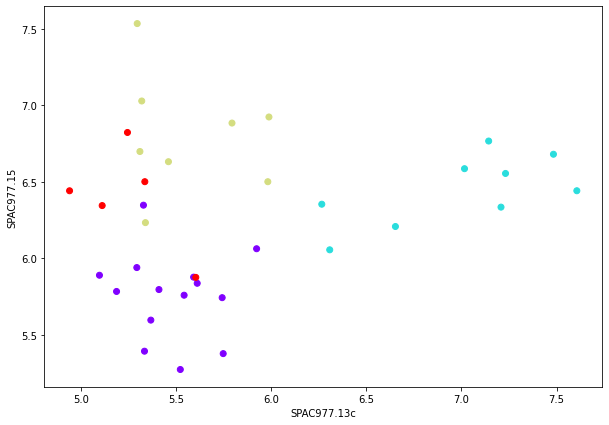

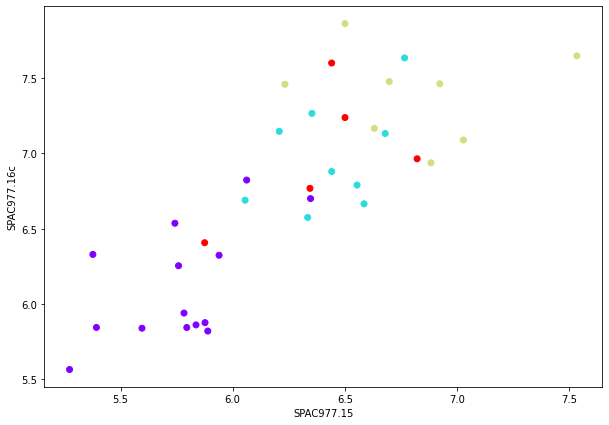

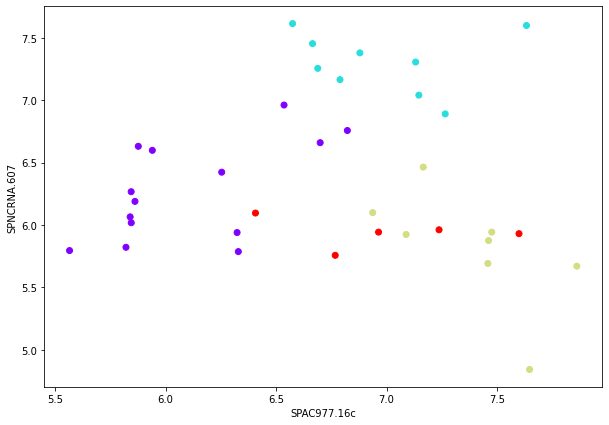

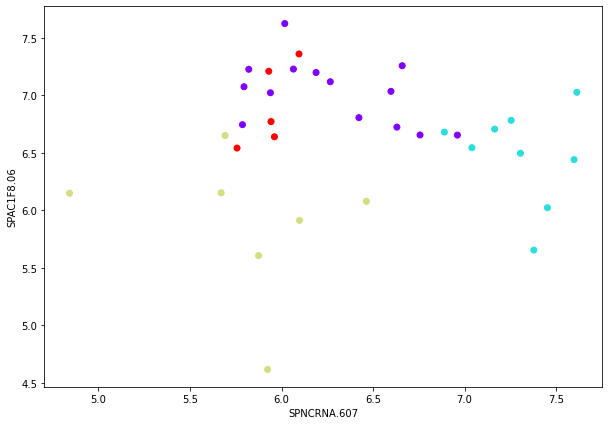

In [12]:
for k in range(1,10):
    plt.figure(figsize=(10, 7))
    plt.scatter(df.iloc[:,k], df.iloc[:,k+1], c=kmeans_model.labels_, cmap='rainbow')
    plt.xlabel(df.iloc[:,[k]].columns[0])
    plt.ylabel(df.iloc[:,[k+1]].columns[0])

## Hierarchical Clustering

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [19]:
agglomerative_model = AgglomerativeClustering(n_clusters = None, affinity='euclidean', linkage='ward',distance_threshold=8)
prediction = agglomerative_model.fit_predict(x)
df['Cluster_Ward'] = prediction

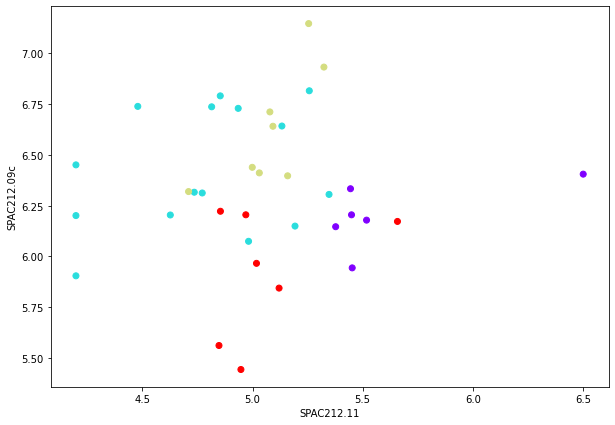

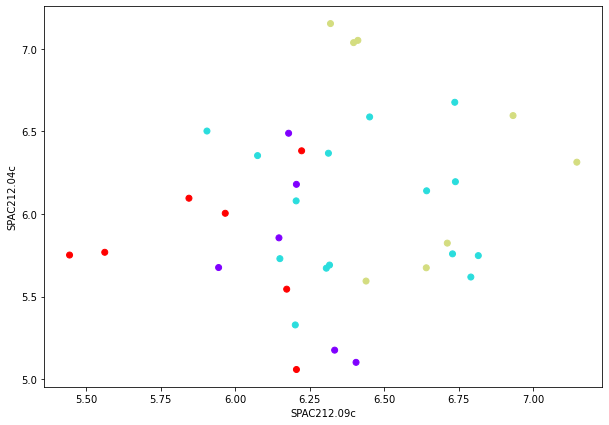

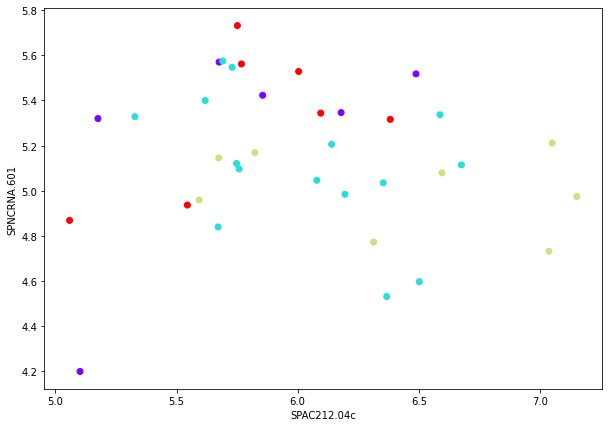

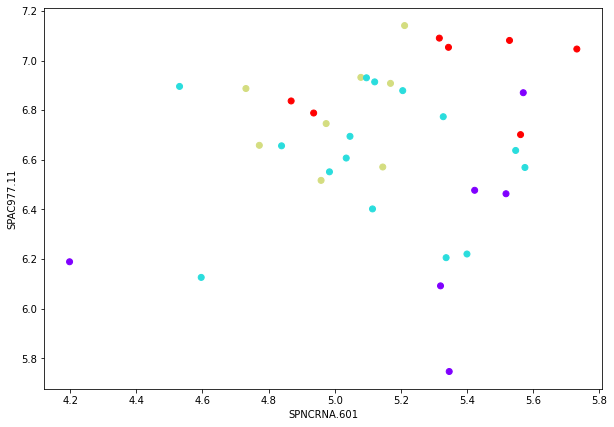

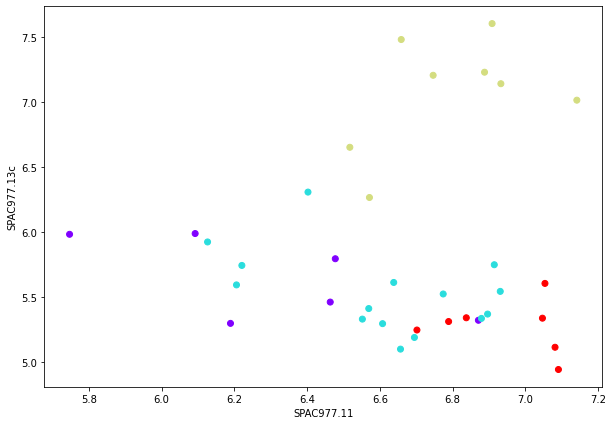

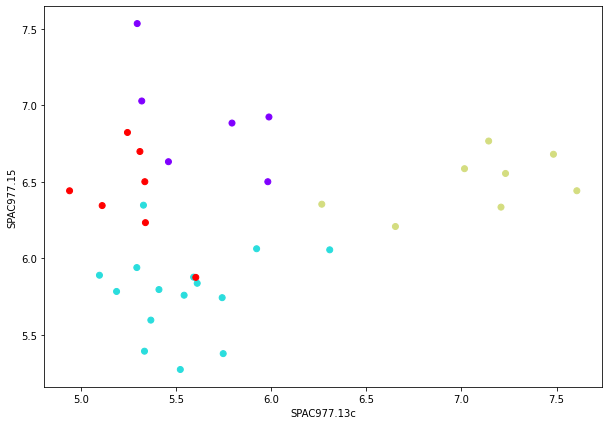

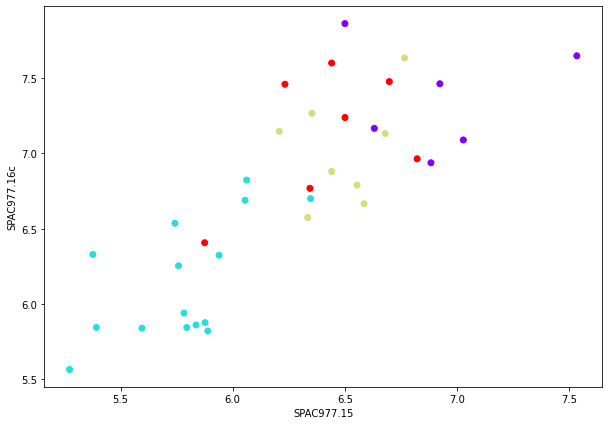

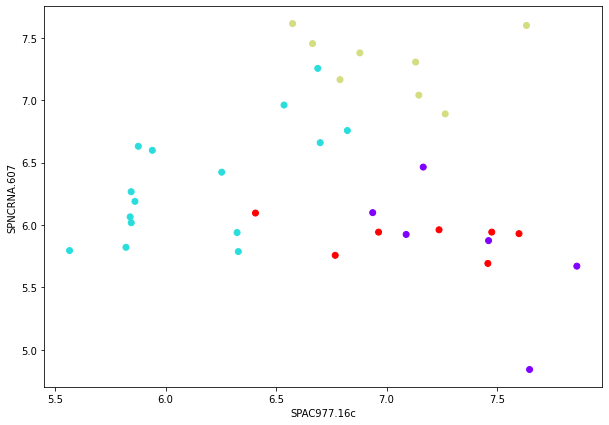

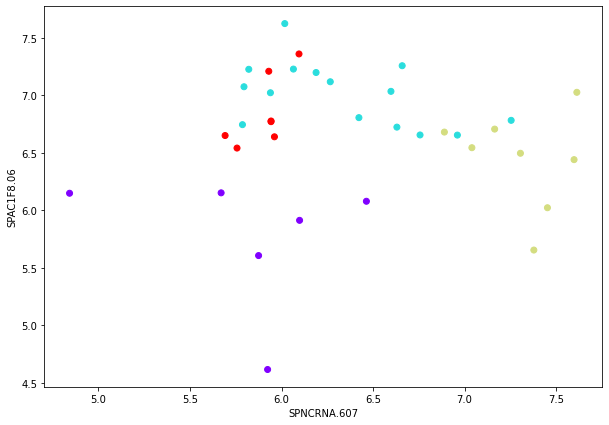

In [20]:
for k in range(1,10):
    plt.figure(figsize=(10, 7))
    plt.scatter(df.iloc[:,k], df.iloc[:,k+1], c=agglomerative_model.labels_, cmap='rainbow')
    plt.xlabel(df.iloc[:,[k]].columns[0])
    plt.ylabel(df.iloc[:,[k+1]].columns[0])

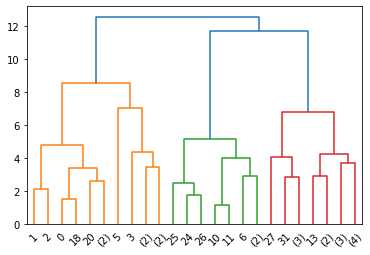

In [21]:
plot_dendrogram(agglomerative_model, truncate_mode="level", p=4)

## Clustering Validation 

In [22]:
display(df.iloc[:,1:11])

,SPAC212.11,SPAC212.09c,SPAC212.04c,SPNCRNA.601,SPAC977.11,SPAC977.13c,SPAC977.15,SPAC977.16c,SPNCRNA.607,SPAC1F8.06
0,4.947329,5.443589,5.751174,5.731843,7.046601,5.335904,6.500652,7.237060,5.961123,6.640223
1,4.969572,6.205209,5.058125,4.868198,6.837324,5.339053,6.232901,7.457934,5.691651,6.651266
2,5.657995,6.172470,5.544557,4.936256,6.788719,5.310125,6.697946,7.475547,5.942602,6.777698
3,5.452545,5.943911,5.675589,5.569892,6.870560,5.319716,7.028231,7.088272,5.923746,4.616742
4,5.444799,6.333457,5.175381,5.319763,6.092104,5.988160,6.923664,7.461087,5.874517,5.607453
5,6.501252,6.405294,5.101433,4.198365,6.189225,5.295882,7.534349,7.646591,4.842055,6.149393
6,5.078831,6.711639,5.823344,5.168548,6.908198,7.606185,6.441425,6.878977,7.377979,5.655475
7,5.254861,7.146486,6.313480,4.772003,6.658501,7.483295,6.680045,7.131173,7.304704,6.497174
8,5.324121,6.932336,6.595747,5.078932,6.932336,7.142835,6.766412,7.632571,7.597660,6.441647
9,4.853563,6.790664,5.618074,5.399681,6.220495,5.742349,5.742349,6.535896,6.960366,6.655092


In [23]:
pd.DataFrame(confusion_matrix(df['Cluster_Kmeans'], df['Cluster_Ward']))

,0,1,2,3
0,0,14,0,0
1,0,1,8,0
2,6,0,0,2
3,0,0,0,5


In [24]:
print(metrics.silhouette_score(df.iloc[:,1:11], df['Cluster_Kmeans'], metric='euclidean'))
print(metrics.silhouette_score(df.iloc[:,1:11], df['Cluster_Ward'], metric='euclidean'))

0.2485306798809125
0.254916449591108


# Exercise 1: Repeat the Determination of the Number of Optimal Clusters using the Silhouette Score. Repeat the clustering

In [25]:
df = pd.read_csv('expression_data.csv')
x = StandardScaler().fit_transform(df.iloc[:,1:])

[5 7 7 2 2 6 1 1 1 4 4 4 0 0 0 0 0 0 5 5 5 2 2 2 8 8 8 3 4 3 3 3 3 3 0 0]
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 2 2 2 1 2 2 1 1 1 1 1 1 0 0 0 0 0 0 2 2 2 1 2 1 1 1 1 1 1 1]
[3 3 2 2 2 2 1 1 1 0 1 1 0 0 0 0 0 0 3 3 3 2 2 2 1 1 1 0 1 0 0 0 0 0 3 0]
[3 3 3 0 0 4 1 1 1 2 1 1 2 2 2 2 2 2 3 3 3 0 0 0 1 1 1 2 1 2 2 2 2 2 2 2]
[0 0 2 2 2 3 4 4 4 1 4 4 1 1 1 1 1 1 0 0 0 2 2 2 4 4 4 5 4 1 1 5 1 1 0 1]
[0 4 4 1 1 5 2 2 2 4 4 4 6 6 6 6 6 6 0 0 0 1 1 1 2 2 2 3 2 3 3 3 3 3 0 6]
[7 5 5 0 2 4 3 3 3 6 6 6 1 1 1 1 1 1 7 7 7 2 2 2 3 3 3 6 6 6 1 6 1 1 1 1]
8 8


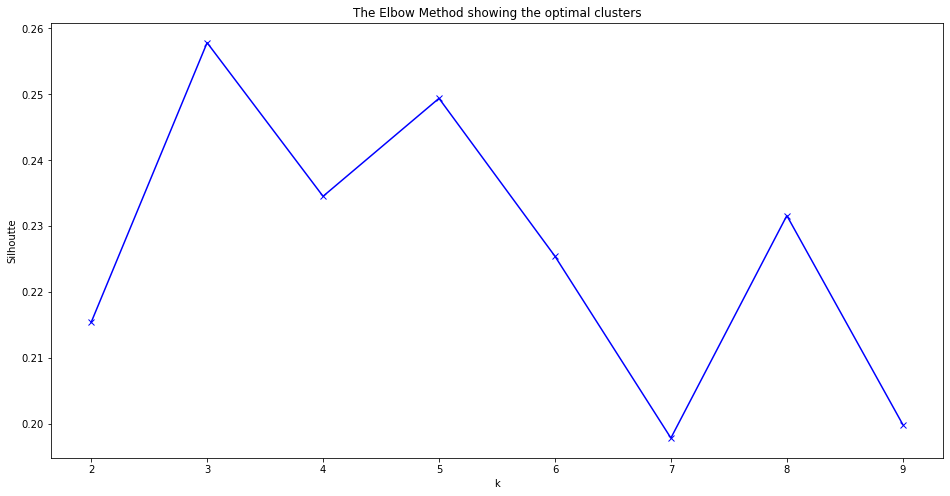

In [34]:
scores = []
K = range(2,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    
plt.figure(figsize=(16,8))
plt.plot(K, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhoutte')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [ ]:
#kmeans_model = KMeans(n_clusters=4, n_jobs=3, random_state=32932)

# Exercise 2: Compare all the methods for aglomerative clustering. Use confusion matrix.